In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df= pd.read_csv("Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv")

In [5]:
col = list(df.columns)
print("total column number: ", len(col))
print(col)

total column number:  12
['outcome', 'month', 'mmwr_week', 'week_date', 'age_group', 'vaccine_product', 'crude_vax_ir', 'crude_unvax_ir', 'crude_irr', 'age_adj_vax_ir', 'age_adj_unvax_ir', 'age_adj_irr']


In [21]:
#df.shape
print(df['mmwr_week'])
df['year'] = '2021'
import datetime

# %U assumes Monday as first day of the week. Use %W for Sunday
df['date'] = pd.to_datetime(df['year'].astype(str) + ' ' + df['mmwr_week'].astype(str) + ' 1',
                                format='%Y %U %w')
print(df)


#df['date']= pd.to_datetime(df['week_date'])
#dfVariant=dfVariant[(dfVariant['date']>'2021-1-1')&(dfVariant['date']<'2021-10-16')]
df.set_index(df['date'], inplace=True)
df.ffill().bfill()

df = df[df["age_group"]=="all_ages_adj"]




# resample to biweekly
#df = df.resample('w').mean()

print(df)
#df.plot.line(x='date', y='crude_vax_ir')


date
2021-04-05    14
2021-04-12    15
2021-04-19    16
2021-04-26    17
2021-05-03    18
2021-05-10    19
2021-05-17    20
2021-05-24    21
2021-05-31    22
2021-06-07    23
2021-06-14    24
2021-06-21    25
2021-06-28    26
2021-07-05    27
2021-07-12    28
2021-07-19    29
2021-07-26    30
2021-08-02    31
2021-08-09    32
2021-08-16    33
2021-08-23    34
2021-08-30    35
2021-04-05    14
2021-04-12    15
2021-04-19    16
2021-04-26    17
2021-05-03    18
2021-05-10    19
2021-05-17    20
2021-05-24    21
2021-05-31    22
2021-06-07    23
2021-06-14    24
2021-06-21    25
2021-06-28    26
2021-07-05    27
2021-07-12    28
2021-07-19    29
2021-07-26    30
2021-08-02    31
2021-08-09    32
2021-08-16    33
2021-08-23    34
2021-08-30    35
Name: mmwr_week, dtype: int64
           outcome     month  mmwr_week      week_date     age_group  \
date                                                                   
2021-04-05    case  04 - APR         14  Apr 04-Apr 10  all_ages_adj   
2

           outcome     month  mmwr_week      week_date     age_group  \
date                                                                   
2021-04-05    case  04 - APR         14  Apr 04-Apr 10  all_ages_adj   
2021-04-12    case  04 - APR         15  Apr 11-Apr 17  all_ages_adj   
2021-04-19    case  04 - APR         16  Apr 18-Apr 24  all_ages_adj   
2021-04-26    case  04 - APR         17  Apr 25-May 01  all_ages_adj   
2021-05-03    case  05 - MAY         18  May 02-May 08  all_ages_adj   
2021-05-10    case  05 - MAY         19  May 09-May 15  all_ages_adj   
2021-05-17    case  05 - MAY         20  May 16-May 22  all_ages_adj   
2021-05-24    case  05 - MAY         21  May 23-May 29  all_ages_adj   
2021-05-31    case  06 - JUN         22  May 30-Jun 05  all_ages_adj   
2021-06-07    case  06 - JUN         23  Jun 06-Jun 12  all_ages_adj   
2021-06-14    case  06 - JUN         24  Jun 13-Jun 19  all_ages_adj   
2021-06-21    case  06 - JUN         25  Jun 20-Jun 26  all_ages

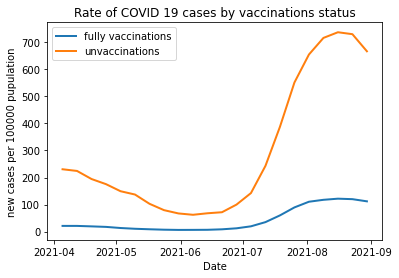

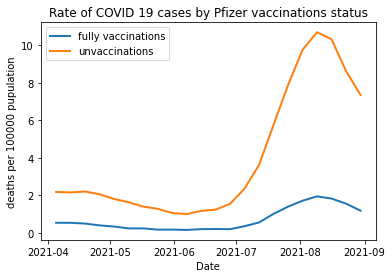

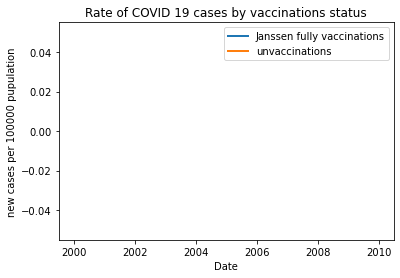

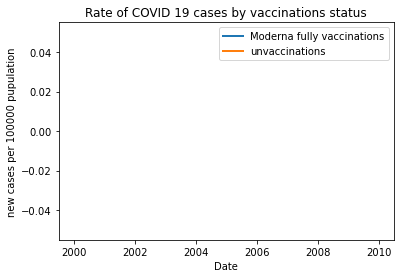

In [32]:
#print(df["vaccine_product"].unique().shape)
#df.set_index('mmwr_week',inplace=True)
dfcase = df[df["outcome"]=="case"]
dfdeath = df[df["outcome"]=="death"]
df_case_all = dfcase[dfcase["vaccine_product"]=="all_types"]
df_case_p = dfcase[dfcase["vaccine_product"]=="Pfizer"]
df_case_m = dfcase[dfcase["vaccine_product"]=="Moderna"]
df_case_j = dfcase[dfcase["vaccine_product"]=="Janssen"]

df_death_all = dfdeath[dfdeath["vaccine_product"]=="all_types"]

print(df_case_all)

plt.plot(df_case_all['crude_vax_ir'],label='fully vaccinations',linewidth=2)
plt.plot(df_case_all['crude_unvax_ir'],label='unvaccinations',linewidth=2)
plt.legend()  
plt.xlabel("Date")
plt.ylabel("new cases per 100000 pupulation")
plt.title("Rate of COVID 19 cases by vaccinations status")
plt.show()

plt.plot(df_death_all['crude_vax_ir'],label='fully vaccinations',linewidth=2)
plt.plot(df_death_all['crude_unvax_ir'],label='unvaccinations',linewidth=2)
plt.legend()  
plt.xlabel("Date")
plt.ylabel("deaths per 100000 pupulation")
plt.title("Rate of COVID 19 cases by Pfizer vaccinations status")
plt.show()

plt.plot(df_case_j['crude_vax_ir'],label='Janssen fully vaccinations',linewidth=2)
plt.plot(df_case_j['crude_unvax_ir'],label='unvaccinations',linewidth=2)
plt.legend()  
plt.xlabel("Date")
plt.ylabel("new cases per 100000 pupulation")
plt.title("Rate of COVID 19 cases by vaccinations status")
plt.show()

plt.plot(df_case_m['crude_vax_ir'],label='Moderna fully vaccinations',linewidth=2)
plt.plot(df_case_m['crude_unvax_ir'],label='unvaccinations',linewidth=2)
plt.legend()  
plt.xlabel("Date")
plt.ylabel("new cases per 100000 pupulation")
plt.title("Rate of COVID 19 cases by vaccinations status")
plt.show()





Empty DataFrame
Columns: [outcome, month, mmwr_week, week_date, age_group, vaccine_product, crude_vax_ir, crude_unvax_ir, crude_irr, age_adj_vax_ir, age_adj_unvax_ir, age_adj_irr, year, date]
Index: []


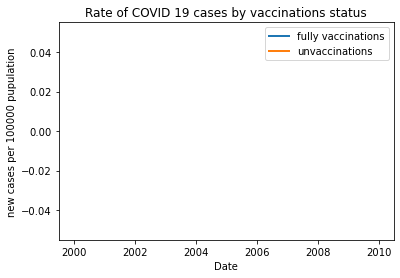

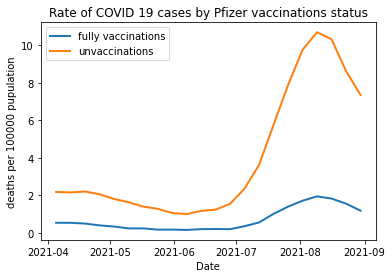

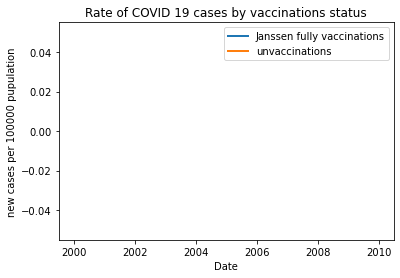

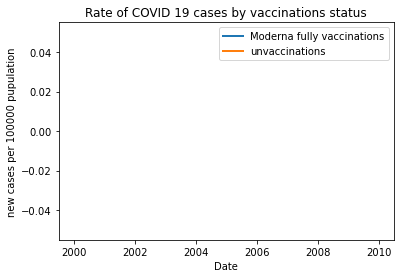

In [34]:

df_case_p = dfcase[dfcase["vaccine_product"]=="Pfizer"]
df_case_m = dfcase[dfcase["vaccine_product"]=="Moderna"]
df_case_j = dfcase[dfcase["vaccine_product"]=="Janssen"]


print(df_case_p)

plt.plot(df_case_p['crude_vax_ir'],label='fully vaccinations',linewidth=2)
plt.plot(df_case_p['crude_unvax_ir'],label='unvaccinations',linewidth=2)
plt.legend()  
plt.xlabel("Date")
plt.ylabel("new cases per 100000 pupulation")
plt.title("Rate of COVID 19 cases by vaccinations status")
plt.show()

plt.plot(df_death_all['crude_vax_ir'],label='fully vaccinations',linewidth=2)
plt.plot(df_death_all['crude_unvax_ir'],label='unvaccinations',linewidth=2)
plt.legend()  
plt.xlabel("Date")
plt.ylabel("deaths per 100000 pupulation")
plt.title("Rate of COVID 19 cases by Pfizer vaccinations status")
plt.show()

plt.plot(df_case_j['crude_vax_ir'],label='Janssen fully vaccinations',linewidth=2)
plt.plot(df_case_j['crude_unvax_ir'],label='unvaccinations',linewidth=2)
plt.legend()  
plt.xlabel("Date")
plt.ylabel("new cases per 100000 pupulation")
plt.title("Rate of COVID 19 cases by vaccinations status")
plt.show()

plt.plot(df_case_m['crude_vax_ir'],label='Moderna fully vaccinations',linewidth=2)
plt.plot(df_case_m['crude_unvax_ir'],label='unvaccinations',linewidth=2)
plt.legend()  
plt.xlabel("Date")
plt.ylabel("new cases per 100000 pupulation")
plt.title("Rate of COVID 19 cases by vaccinations status")
plt.show()



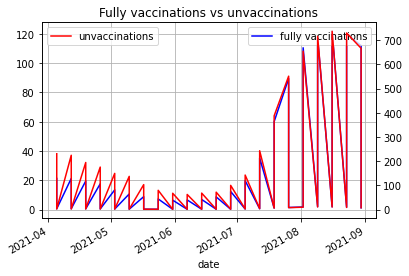

In [12]:
#dfcase.set_index(dfcase['week_date'], inplace=True)
#df_group = dfcase.groupby(['vaccine_product']).size()
#print(df_group)


grouped = dfdeath.groupby('vaccine_product')
#print(grouped.get_group('Janssen'))
df_janssen= grouped.get_group('Janssen')
df_moderna = grouped.get_group('Moderna')
df_pfizer = grouped.get_group('Pfizer')
df_all_types = grouped.get_group('all_types')
#print(df_unviccine.shape)
#print(df_pfizer.shape)

 
plt.title('Fully vaccinations vs unvaccinations')
ax1 = df_all_types.crude_vax_ir.plot(color='blue', grid=True, label='fully vaccinations')
ax2 = df_all_types.crude_unvax_ir.plot(color='red', grid=True, secondary_y=True, label='unvaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()





In [13]:
dfUSA = df[df["location"]=="United States"].resample('w').mean()
dfAF = df[df["location"]=="South Africa"].resample('w').mean()
dfJP = df[df["location"]=="Japan"].resample('w').mean()
dfUK = df[df["location"]=="United Kingdom"].resample('w').mean()
dfDE = df[df["location"]=="Germany"].resample('w').mean()
dfAU = df[df["location"]=="Australia"].resample('m').mean()
dfCA = df[df["location"]=="Canada"].resample('w').mean()
dfIT = df[df["location"]== "Italy"].resample('w').mean()
dfBR = df[df["location"]== "Brazil"].resample('w').mean()

KeyError: 'location'

In [7]:
dfUSA.columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
  

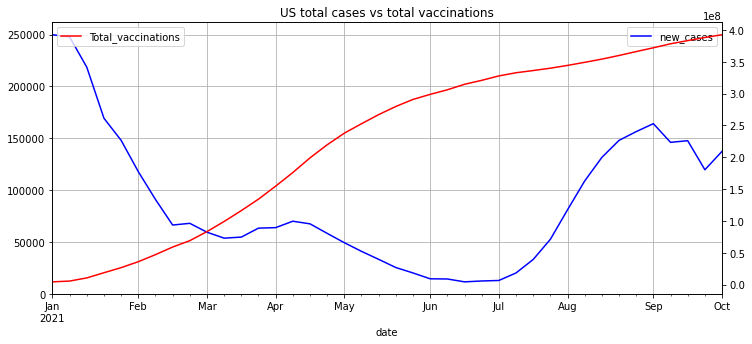

In [8]:
# US
plt.figure(figsize=(12,5))
# plt.figure(figsize=(12,5))
plt.title('US daily new cases vs total vaccinations')
ax1 = dfUSA.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfUSA.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

In [9]:
overall_pearson_r = dfUSA.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r (total_cases/total_vaccinations): {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943


Pandas computed Pearson r (total_cases/total_vaccinations): 0.9258003690838963


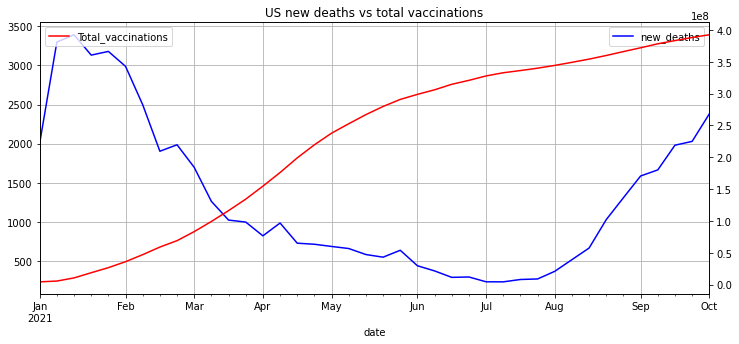

In [10]:
plt.figure(figsize=(12,5))
# plt.figure(figsize=(12,5))
plt.title('US new deaths vs total vaccinations')
ax1 = dfUSA.new_deaths.plot(color='blue', grid=True, label='new_deaths')
ax2 = dfUSA.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

In [197]:
overall_pearson_r = dfUSA.corr().loc['total_deaths','total_vaccinations']
print(f"Pandas computed Pearson r (total_deaths/total_vaccinations): {overall_pearson_r}")

Pandas computed Pearson r (total_deaths/total_vaccinations): 0.9421154531929513


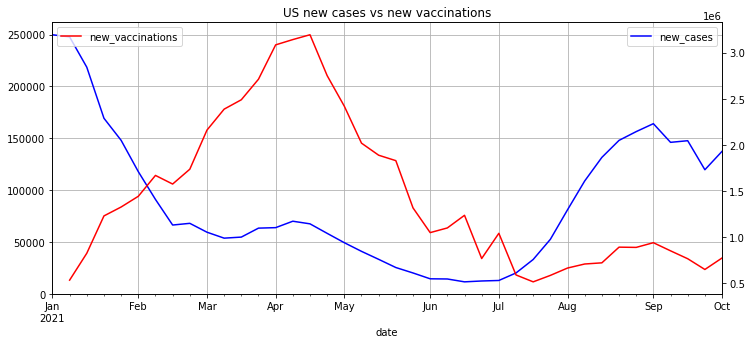

In [198]:
plt.figure(figsize=(12,5))
plt.title('US new cases vs new vaccinations')
ax1 = dfUSA.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfUSA.new_vaccinations.plot(color='red', grid=True, secondary_y=True, label='new_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()


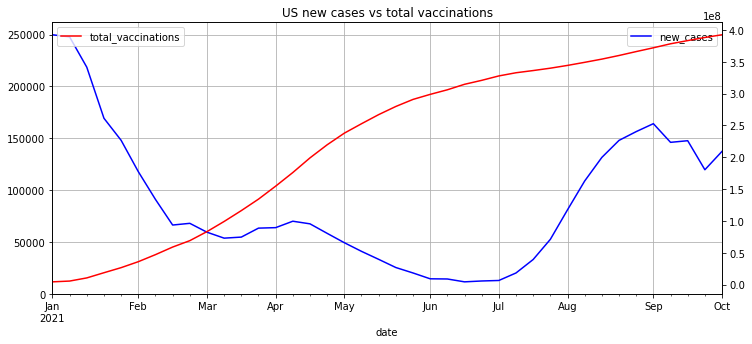

In [199]:
plt.figure(figsize=(12,5))
plt.title('US new cases vs total vaccinations')
ax1 = dfUSA.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfUSA.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

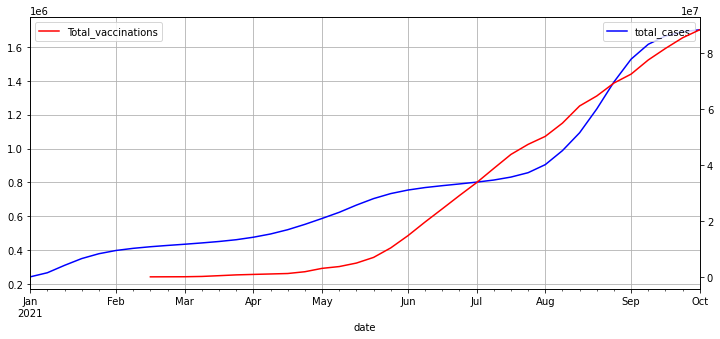

In [200]:
#Japan
plt.figure(figsize=(12,5))
# plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')
ax1 = dfJP.total_cases.plot(color='blue', grid=True, label='total_cases')
ax2 = dfJP.people_vaccinated.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

In [201]:
overall_pearson_r = dfJP.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r: {overall_pearson_r}")


Pandas computed Pearson r: 0.9660762766280172


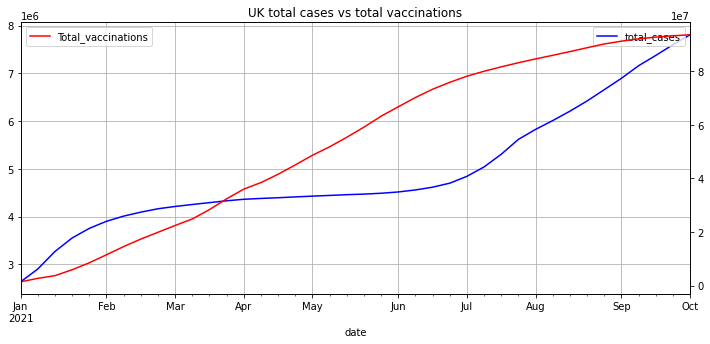

Pandas computed Pearson r (total_cases/total_vaccinations): 0.8677741030649915


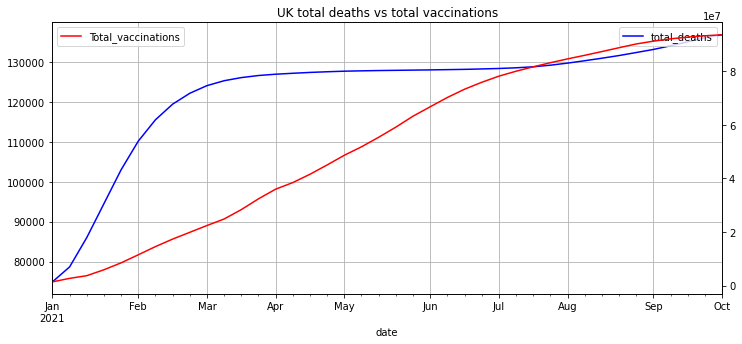

Pandas computed Pearson r (total_deaths/total_vaccinations): 0.7690964562626695


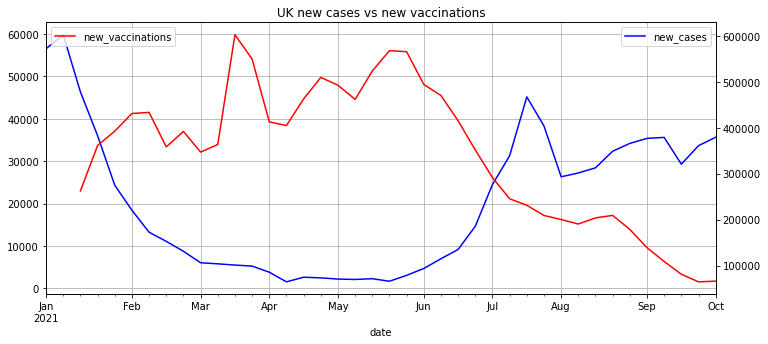

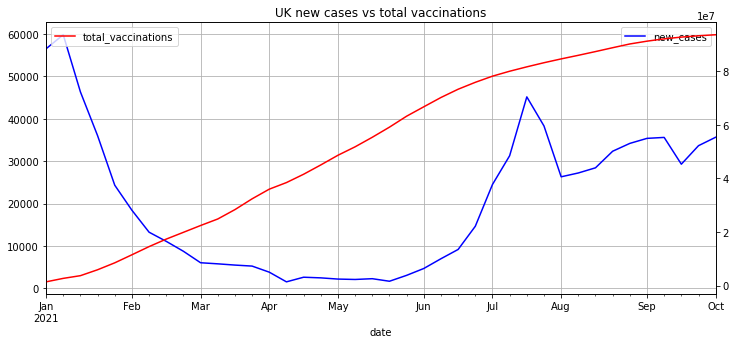

In [202]:
# UK
plt.figure(figsize=(12,5))
plt.title('UK total cases vs total vaccinations')
ax1 = dfUK.total_cases.plot(color='blue', grid=True, label='total_cases')
ax2 = dfUK.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# Pearson r of UK total cases vs total vaccinations
overall_pearson_r = dfUK.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r (total_cases/total_vaccinations): {overall_pearson_r}")


# UK total deaths vs total vaccinations

plt.figure(figsize=(12,5))
plt.title('UK total deaths vs total vaccinations')
ax1 = dfUK.total_deaths.plot(color='blue', grid=True, label='total_deaths')
ax2 = dfUK.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# pearson r of UK total deaths vs total vaccinations
overall_pearson_r = dfUK.corr().loc['total_deaths','total_vaccinations']
print(f"Pandas computed Pearson r (total_deaths/total_vaccinations): {overall_pearson_r}")

# UK new cases vs new vaccinations
plt.figure(figsize=(12,5))
plt.title('UK new cases vs new vaccinations')
ax1 = dfUK.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfUK.new_vaccinations.plot(color='red', grid=True, secondary_y=True, label='new_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()


# UK new cases vs total vaccinations
plt.figure(figsize=(12,5))
plt.title('UK new cases vs total vaccinations')
ax1 = dfUK.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfUK.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

In [203]:
dfAU = df[df["location"]=="Australia"].resample('sm').mean()
# dfAU = df[df["location"]=="Australia"]

print(dfAU.shape, dfAU)

(19, 60)               total_cases    new_cases  new_cases_smoothed  total_deaths  \
date                                                                       
2020-12-31   28581.692308    16.076923           19.109923    909.000000   
2021-01-15   28760.750000     8.875000           10.259000    909.000000   
2021-01-31   28859.533333     5.933333            6.038133    909.000000   
2021-02-15   28933.615385     5.384615            5.033000    909.000000   
2021-02-28   29052.200000    10.666667            9.914200    909.000000   
2021-03-15   29220.125000    10.875000           10.446375    909.000000   
2021-03-31   29385.866667    11.000000           10.495200    909.200000   
2021-04-15   29628.866667    21.933333           19.771400    910.000000   
2021-04-30   29898.933333    11.066667           15.038000    910.000000   
2021-05-15   30027.937500     8.812500            7.883750    910.000000   
2021-05-31   30195.066667    11.200000           11.276133    910.000000   
202

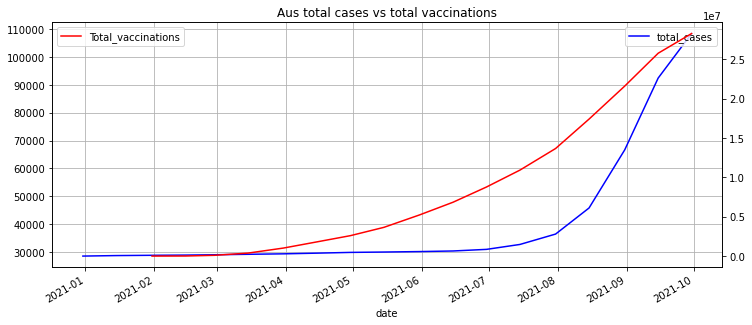

Pandas computed Pearson r (total_cases/total_vaccinations): 0.9000680267657194


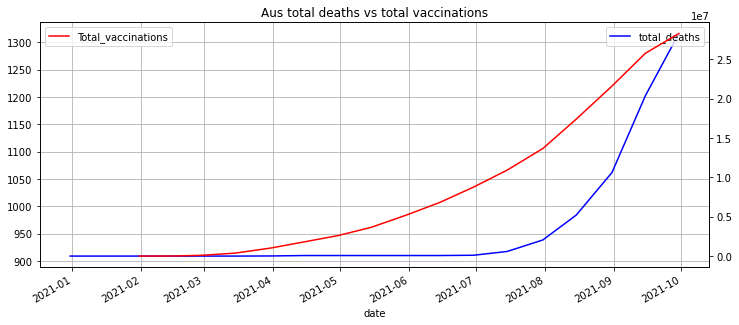

Pandas computed Pearson r (total_deaths/total_vaccinations): 0.8765044276067359


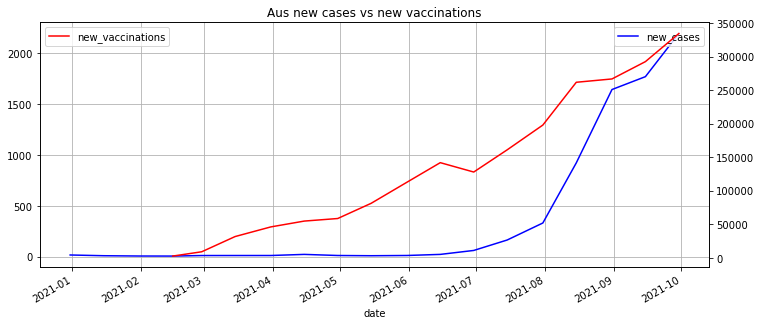

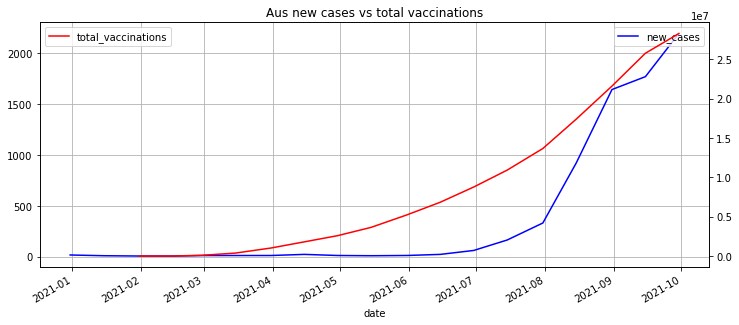

In [204]:
# Aus
plt.figure(figsize=(12,5))
plt.title('Aus total cases vs total vaccinations')
ax1 = dfAU.total_cases.plot(color='blue', grid=True, label='total_cases')
ax2 = dfAU.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# Pearson r of UK total cases vs total vaccinations
overall_pearson_r = dfAU.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r (total_cases/total_vaccinations): {overall_pearson_r}")


# Aus total deaths vs total vaccinations

plt.figure(figsize=(12,5))
plt.title('Aus total deaths vs total vaccinations')
ax1 = dfAU.total_deaths.plot(color='blue', grid=True, label='total_deaths')
ax2 = dfAU.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# pearson r of UK total deaths vs total vaccinations
overall_pearson_r = dfAU.corr().loc['total_deaths','total_vaccinations']
print(f"Pandas computed Pearson r (total_deaths/total_vaccinations): {overall_pearson_r}")

# Aus new cases vs new vaccinations
plt.figure(figsize=(12,5))
plt.title('Aus new cases vs new vaccinations')
ax1 = dfAU.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfAU.new_vaccinations.plot(color='red', grid=True, secondary_y=True, label='new_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()


# Aus new cases vs total vaccinations
plt.figure(figsize=(12,5))
plt.title('Aus new cases vs total vaccinations')
ax1 = dfAU.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfAU.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

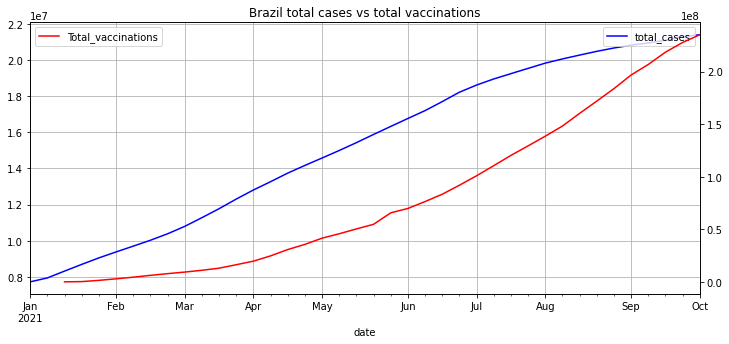

Pandas computed Pearson r (total_cases/total_vaccinations): 0.9314449583536577


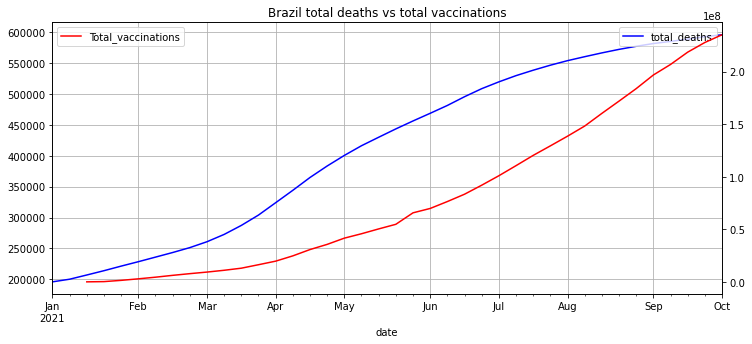

Pandas computed Pearson r (total_deaths/total_vaccinations): 0.9207997041668285


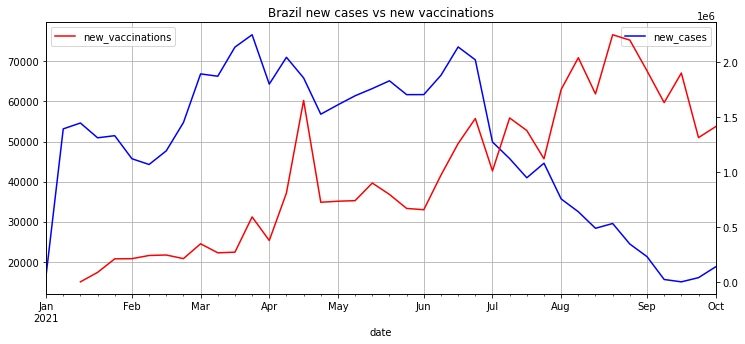

In [205]:
# BR
plt.figure(figsize=(12,5))
plt.title('Brazil total cases vs total vaccinations')
ax1 = dfBR.total_cases.plot(color='blue', grid=True, label='total_cases')
ax2 = dfBR.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# Pearson r of UK total cases vs total vaccinations
overall_pearson_r = dfBR.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r (total_cases/total_vaccinations): {overall_pearson_r}")


# Aus total deaths vs total vaccinations

plt.figure(figsize=(12,5))
plt.title('Brazil total deaths vs total vaccinations')
ax1 = dfBR.total_deaths.plot(color='blue', grid=True, label='total_deaths')
ax2 = dfBR.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# pearson r of UK total deaths vs total vaccinations
overall_pearson_r = dfBR.corr().loc['total_deaths','total_vaccinations']
print(f"Pandas computed Pearson r (total_deaths/total_vaccinations): {overall_pearson_r}")

# Aus new cases vs new vaccinations
plt.figure(figsize=(12,5))
plt.title('Brazil new cases vs new vaccinations')
ax1 = dfBR.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfBR.new_vaccinations.plot(color='red', grid=True, secondary_y=True, label='new_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

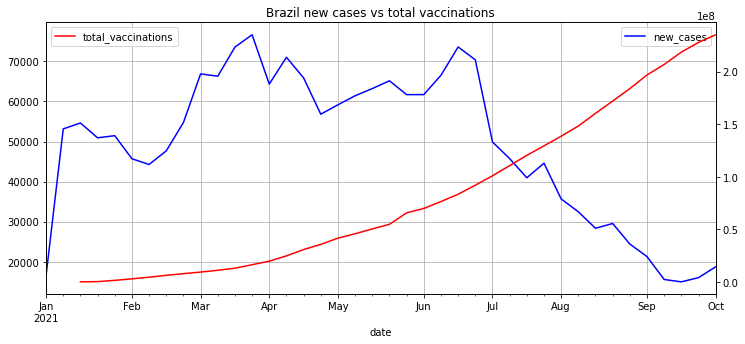

In [206]:
# Aus new cases vs total vaccinations
plt.figure(figsize=(12,5))
plt.title('Brazil new cases vs total vaccinations')
ax1 = dfBR.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfBR.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()
